In [2]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import axis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import StackingClassifier
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
RANDOM_STATE = 42

In [4]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
features = data.drop('quality', axis=1)
features

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [6]:
target = data['quality']
target

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
def calc_metrix_by_cross_val(model, name_model, feat, y_true):
    accuracy = cross_val_score(model, feat, y_true, scoring='accuracy')
    print(f'Metrics for {name_model}: accuracy = {np.mean(accuracy)}')

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [8]:
decision_tree = DecisionTreeClassifier()
calc_metrix_by_cross_val(decision_tree, 'DecisionTreeClassifier', features, target)

Metrics for DecisionTreeClassifier: accuracy = 0.4802919278996865


In [8]:
bagging = BaggingClassifier(n_estimators=100)
calc_metrix_by_cross_val(bagging, 'DecisionTreeClassifier', features, target)

Metrics for DecisionTreeClassifier: accuracy = 0.5603585423197492


In [9]:
random_forest = RandomForestClassifier(n_estimators=100)
calc_metrix_by_cross_val(random_forest, 'RandomForestClassifier', features, target)

Metrics for RandomForestClassifier: accuracy = 0.5778546238244514


Случайный лес показал лучшую точность на данных, так как не требует масштабирования данных

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [8]:
labels = list(map(lambda x: x - 3, target))

In [9]:
np.unique(target)

array([3, 4, 5, 6, 7, 8])

In [10]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=RANDOM_STATE, stratify=labels)

In [12]:
y_trained_stratified = pd.Series(map(lambda x: x - 3, y_train))
y_test_stratified = pd.Series(map(lambda x: x - 3, y_test))

In [15]:
np.unique(y_trained_stratified)

array([0, 1, 2, 3, 4, 5])

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [16]:
l = [10, 50, 100]
l1 = list(np.arange(200, 5200, 200))
n_tress = l + l1

In [17]:
accuracy = {}
for n_tree in n_tress:
    cl = RandomForestClassifier(n_estimators=n_tree, random_state=RANDOM_STATE)
    cl.fit(X_train, y_train)
    y_pred = cl.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy[n_tree] = acc
    print(f'num trees: {n_tree} :: accuracy: {acc}')

num trees: 10 :: accuracy: 0.6270833333333333
num trees: 50 :: accuracy: 0.66875
num trees: 100 :: accuracy: 0.6583333333333333
num trees: 200 :: accuracy: 0.6520833333333333
num trees: 400 :: accuracy: 0.6645833333333333
num trees: 600 :: accuracy: 0.6666666666666666
num trees: 800 :: accuracy: 0.6625
num trees: 1000 :: accuracy: 0.6625
num trees: 1200 :: accuracy: 0.6645833333333333
num trees: 1400 :: accuracy: 0.6666666666666666
num trees: 1600 :: accuracy: 0.66875
num trees: 1800 :: accuracy: 0.66875
num trees: 2000 :: accuracy: 0.6708333333333333
num trees: 2200 :: accuracy: 0.6708333333333333
num trees: 2400 :: accuracy: 0.6666666666666666
num trees: 2600 :: accuracy: 0.6645833333333333
num trees: 2800 :: accuracy: 0.6666666666666666
num trees: 3000 :: accuracy: 0.6645833333333333
num trees: 3200 :: accuracy: 0.6666666666666666
num trees: 3400 :: accuracy: 0.6666666666666666
num trees: 3600 :: accuracy: 0.6729166666666667
num trees: 3800 :: accuracy: 0.66875
num trees: 4000 :: ac

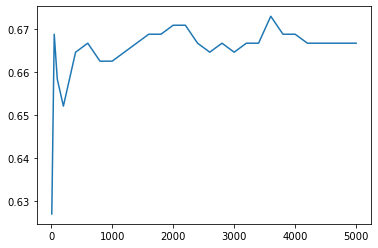

In [41]:
plt.plot(accuracy.keys(), accuracy.values())

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [17]:
boost_sk = GradientBoostingClassifier(random_state=RANDOM_STATE)
calc_metrix_by_cross_val(boost_sk, 'GradientBoostingClassifier', features, labels)

Metrics for GradientBoostingClassifier: accuracy = 0.5665967868338557


In [18]:
boost_xg = XGBClassifier(random_state=RANDOM_STATE)
calc_metrix_by_cross_val(boost_xg, 'XGBClassifier', features, labels)

Metrics for XGBClassifier: accuracy = 0.5472335423197492


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [28]:
def print_results(results):
    for i in range(len(results['params'])):
        res = str(results['params'][i]) + ' '
        res += 'mean_test_score = ' + str(results['mean_test_score'][i]) + ' '
        # res += 'mean_train_score = ' + str(results['mean_train_score'][i]) + ' '
        res += 'mean_score_time = ' + str(results['mean_score_time'][i]) 
        print(res)

In [13]:
l1 = list(np.arange(100, 600, 200))
n_estim = l1
n_estim

[100, 300, 500]

In [21]:
n_estim

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

In [35]:
model = GradientBoostingClassifier(random_state=RANDOM_STATE)
grid = {
        'learning_rate': np.power(10.0, np.arange(-3, 0)),
        'n_estimators': n_estim,
        'max_depth': np.arange(1, 6),
        'criterion': ['friedman_mse', 'squared_error']
        }
gs = GridSearchCV(model, grid, scoring='accuracy', cv=3)
gs.fit(X_train, y_train)
results = gs.cv_results_
print(f"best accuracy: {results['mean_test_score'][np.argmax(results['mean_test_score'])]} with score_time: {results['mean_score_time'][np.argmax(results['mean_test_score'])]} \n for parameters: {str(results['params'][np.argmax(results['mean_test_score'])])}")

best accuracy: 0.646112600536193 with score_time: 0.020570119222005207 
 for parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


In [39]:
model = XGBClassifier(random_state=RANDOM_STATE)
grid = {
        'learning_rate': np.power(10.0, np.arange(-3, 0)),
        'n_estimators': n_estim,
        'max_depth': np.arange(4, 8),
        'eval_metric': ['rmse', 'mlogloss']
        }
gs = GridSearchCV(model, grid, scoring='accuracy', cv=3)
gs.fit(X_train, y_trained_stratified)
results = gs.cv_results_
print(f"best accuracy: {results['mean_test_score'][np.argmax(results['mean_test_score'])]} with score_time: {results['mean_score_time'][np.argmax(results['mean_test_score'])]} \n for parameters: {str(results['params'][np.argmax(results['mean_test_score'])])}")

best accuracy: 0.6344950848972296 with score_time: 0.005337953567504883 
 for parameters: {'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [11]:
lgbm_model = LGBMClassifier(random_state=RANDOM_STATE)

In [ ]:
calc_metrix_by_cross_val(lgbm_model, 'LGBMClassifier', features, labels)

Experience lack of memory error with kernel crasing, but launch in colab resulted in "Metrics for LGBMClassifier: accuracy = 0.5541026645768025"

In [11]:
cat_boost = CatBoostClassifier(random_seed=RANDOM_STATE)
calc_metrix_by_cross_val(cat_boost, 'CatBoostClassifier', features, labels)

Learning rate set to 0.080126
0:	learn: 1.6873468	total: 60.2ms	remaining: 1m
1:	learn: 1.5955924	total: 64.8ms	remaining: 32.3s
2:	learn: 1.5267535	total: 68.1ms	remaining: 22.6s
3:	learn: 1.4637364	total: 71ms	remaining: 17.7s
4:	learn: 1.4114343	total: 74.5ms	remaining: 14.8s
5:	learn: 1.3599572	total: 77.4ms	remaining: 12.8s
6:	learn: 1.3132387	total: 80.3ms	remaining: 11.4s
7:	learn: 1.2739374	total: 84.2ms	remaining: 10.4s
8:	learn: 1.2369788	total: 89.3ms	remaining: 9.84s
9:	learn: 1.2056033	total: 94.6ms	remaining: 9.37s
10:	learn: 1.1743571	total: 97.6ms	remaining: 8.77s
11:	learn: 1.1480773	total: 102ms	remaining: 8.37s
12:	learn: 1.1236837	total: 105ms	remaining: 7.95s
13:	learn: 1.1005468	total: 108ms	remaining: 7.57s
14:	learn: 1.0827114	total: 111ms	remaining: 7.27s
15:	learn: 1.0638758	total: 114ms	remaining: 6.99s
16:	learn: 1.0478027	total: 117ms	remaining: 6.76s
17:	learn: 1.0322315	total: 120ms	remaining: 6.53s
18:	learn: 1.0180084	total: 123ms	remaining: 6.37s
19:	l

Metrics for GradientBoostingClassifier: accuracy = 0.5665967868338557

Metrics for XGBClassifier: accuracy = 0.5472335423197492

Metrics for LGBMClassifier: accuracy = 0.5541026645768025

Metrics for CatBoostClassifier: accuracy = 0.5516105015673981

GradientBoostingClassifier показал результат по метрике accuracy выше при дефолтных параметрах, чем другие классификаторы

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [ ]:
model = LGBMClassifier(random_state=RANDOM_STATE)
grid = {
        'learning_rate': np.power(10.0, np.arange(-3, 0)),
        'n_estimators': n_estim,
        'max_depth': np.arange(1, 6),
        'objective': ['multiclass']
        }
gs = GridSearchCV(model, grid, scoring='accuracy', cv=3)
gs.fit(X_train, y_train)
results = gs.cv_results_
print(f"best accuracy: {results['mean_test_score'][np.argmax(results['mean_test_score'])]} with score_time: {results['mean_score_time'][np.argmax(results['mean_test_score'])]} \n for parameters: {str(results['params'][np.argmax(results['mean_test_score'])])}")

Experienced lack of the memory again with lgbm, results on colab: 

best accuracy: 0.6255585344057194 with score_time: 0.03381156921386719 

for parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'objective': 'multiclass'}

In [11]:
model = CatBoostClassifier(random_state=RANDOM_STATE)
grid = {
        'learning_rate': np.power(10.0, np.arange(-3, 0)),
        'n_estimators': n_estim,
        'max_depth': np.arange(1, 6),
        'objective': ['MultiClass']
        }
gs = GridSearchCV(model, grid, scoring='accuracy', cv=3)
gs.fit(X_train, y_train)
results = gs.cv_results_
print(f"best accuracy: {results['mean_test_score'][np.argmax(results['mean_test_score'])]} with score_time: {results['mean_score_time'][np.argmax(results['mean_test_score'])]} \n for parameters: {str(results['params'][np.argmax(results['mean_test_score'])])}")

0:	learn: 1.7906562	total: 51.2ms	remaining: 5.07s
1:	learn: 1.7895483	total: 52.1ms	remaining: 2.55s
2:	learn: 1.7884232	total: 52.8ms	remaining: 1.71s
3:	learn: 1.7870566	total: 53.5ms	remaining: 1.28s
4:	learn: 1.7859683	total: 54.2ms	remaining: 1.03s
5:	learn: 1.7847481	total: 54.8ms	remaining: 858ms
6:	learn: 1.7834273	total: 55.4ms	remaining: 736ms
7:	learn: 1.7821105	total: 56ms	remaining: 644ms
8:	learn: 1.7809079	total: 56.6ms	remaining: 572ms
9:	learn: 1.7795936	total: 57.1ms	remaining: 514ms
10:	learn: 1.7784165	total: 57.7ms	remaining: 467ms
11:	learn: 1.7772160	total: 58.4ms	remaining: 428ms
12:	learn: 1.7758752	total: 58.9ms	remaining: 394ms
13:	learn: 1.7747074	total: 59.4ms	remaining: 365ms
14:	learn: 1.7735474	total: 60ms	remaining: 340ms
15:	learn: 1.7724895	total: 60.7ms	remaining: 319ms
16:	learn: 1.7714231	total: 61.5ms	remaining: 300ms
17:	learn: 1.7701003	total: 62ms	remaining: 283ms
18:	learn: 1.7690304	total: 62.6ms	remaining: 267ms
19:	learn: 1.7678964	total: 

### Результаты подбора параметров для алгоритмов:
1. *GradientBoostingClassifier*

 best accuracy: 0.646112600536193 with score_time: 0.020570119222005207 

 for parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

2. *XGBClassifier*

 best accuracy: 0.6344950848972296 with score_time: 0.005337953567504883 

 for parameters: {'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

3. *LGBMClassifier*

 best accuracy: 0.6255585344057194 with score_time: 0.03381156921386719 

 for parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'objective': 'multiclass'}

4. *CatBoostClassifier*

 best accuracy: 0.6425379803395889 with score_time: 0.006641785303751628 
 
 for parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'objective': 'MultiClass'}

Качество работы всех классификаторов сильно улучшилось по сравнению с использованием базовых параметров обучения. По 2 метрикам (качество accuracy и score_time) на первом месте CatBoostClassifier, также он оказался одним из наиболее быстрых алгоритмов во время обучения. Точности работы классификаторов достаточно близки друг к другу.

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [15]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [17]:
def hyperopt_grad_boost(params):
    clf = GradientBoostingClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()

def hyperopt_xgb(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_trained_stratified, scoring='accuracy').mean()

def hyperopt_lgbm(params):
    clf = LGBMClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()

def hyperopt_cat_boost(params):
    clf = CatBoostClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()

In [19]:
space = {
    'learning_rate': hp.choice('learning_rate', list(np.power(10.0, np.arange(-3, 0)))),
    'n_estimators': hp.choice('n_estimators', list(np.arange(100, 600, 200))),
    'max_depth': hp.choice('max_depth', list(np.arange(3, 6)))
}

def f_grad(params):
    acc = hyperopt_grad_boost(params)
    return {'loss': -acc, 'status': STATUS_OK}

def f_xgb(params):
    acc = hyperopt_xgb(params)
    return {'loss': -acc, 'status': STATUS_OK}

def f_lgbm(params):
    acc = hyperopt_lgbm(params)
    return {'loss': -acc, 'status': STATUS_OK}

def f_cat(params):
    acc = hyperopt_cat_boost(params)
    return {'loss': -acc, 'status': STATUS_OK}

In [29]:
list(np.arange(100, 600, 200))

[100, 300, 500]

In [30]:
list(np.arange(3, 6))

[3, 4, 5]

In [31]:
list(np.power(10.0, np.arange(-3, 0)))

[0.001, 0.01, 0.1]

In [28]:
trials = Trials()
best = fmin(f_grad, space, algo=tpe.suggest, max_evals=10, trials=trials)
best

100%|██████████| 10/10 [03:15<00:00, 19.52s/trial, best loss: -0.6630605381165919]


{'learning_rate': 2, 'max_depth': 2, 'n_estimators': 1}

In [36]:
trials = Trials()
best = fmin(f_xgb, space, algo=tpe.suggest, max_evals=10, trials=trials)
best

100%|██████████| 10/10 [00:44<00:00,  4.46s/trial, best loss: -0.6478819666880204]


{'learning_rate': 2, 'max_depth': 2, 'n_estimators': 0}

In [ ]:
trials = Trials()
best = fmin(f_lgbm, space, algo=tpe.suggest, max_evals=10, trials=trials)
best

In [20]:
trials = Trials()
best = fmin(f_cat, space, algo=tpe.suggest, max_evals=10, trials=trials)
best

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]0:	learn: 1.6807100	total: 62.4ms	remaining: 31.2s
1:	learn: 1.5742342	total: 64ms	remaining: 15.9s
2:	learn: 1.4907209	total: 65.1ms	remaining: 10.8s
3:	learn: 1.4231981	total: 66.5ms	remaining: 8.24s
4:	learn: 1.3662625	total: 67.9ms	remaining: 6.72s
5:	learn: 1.3165298	total: 70.3ms	remaining: 5.79s
6:	learn: 1.2726625	total: 71.9ms	remaining: 5.06s
7:	learn: 1.2354679	total: 73.4ms	remaining: 4.51s
8:	learn: 1.2026874	total: 74.8ms	remaining: 4.08s
9:	learn: 1.1751669	total: 76.2ms	remaining: 3.73s
10:	learn: 1.1485300	total: 77.8ms	remaining: 3.46s
11:	learn: 1.1262949	total: 79.1ms	remaining: 3.22s
12:	learn: 1.1049926	total: 80.4ms	remaining: 3.01s
13:	learn: 1.0872295	total: 81.6ms	remaining: 2.83s
14:	learn: 1.0673752	total: 82.8ms	remaining: 2.68s
15:	learn: 1.0527697	total: 84.2ms	remaining: 2.55s
16:	learn: 1.0380977	total: 85.4ms	remaining: 2.42s
17:	learn: 1.0240608	total: 86.7ms	remaining: 2.32s
18:	learn: 1.0090621	t

{'learning_rate': 2, 'max_depth': 1, 'n_estimators': 2}

### Hyperopt оптимизация дала следующие результаты:

1. GradientBoostingClassifier:

    accuracy = 0.6630605381165919, {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

2. XGBClassifier:

    accuracy = 0.6478819666880204, {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

3. LGBMClassifier:

    accuracy = 0.6371596732863549, {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

4. CatBoostClassifier:

    accuracy = 0.6470051249199231, {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

Hyperopt определил параметры, при которых самая большая метрика accuracy получилась на градиентном бустинге

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:
estimators = [
    ('xgb', XGBClassifier(random_state=RANDOM_STATE, n_estimators=100, learning_rate=0.1, max_depth=3)),
    ('lgbm', LGBMClassifier(random_state=RANDOM_STATE, n_estimators=100, learning_rate=0.1, max_depth=3)),
    ('cat', CatBoostClassifier(random_seed=RANDOM_STATE, n_estimators=100, learning_rate=0.1, max_depth=3))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=100, learning_rate=0.1, max_depth=3)
)
print(f'accuracy: {cross_val_score(clf, X_train, y_train, scoring="accuracy").mean()}')

т.к. lgbm так и не хочет работать, результат с colab: *accuracy: 0.589790198590647*

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:
estimators = [
    ('gb', GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=300, learning_rate=0.01, max_depth=5, criterion='friedman_mse')),
    ('xgb', XGBClassifier(random_state=RANDOM_STATE, n_estimators=300, learning_rate=0.1, max_depth=5, eval_metric='rmse')),
    ('lgbm', LGBMClassifier(random_state=RANDOM_STATE, n_estimators=300, learning_rate=0.1, max_depth=5, objective='multiclass'))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=CatBoostClassifier(random_seed=RANDOM_STATE, n_estimators=500, learning_rate=0.1, max_depth=5, objective='MultiClass')
)
print(f'accuracy: {cross_val_score(clf, X_train, y_train, scoring="accuracy").mean()}')

т.к. lgbm так и не хочет работать, результат с colab: *accuracy: 0.6505325112107624*

Результат объединения классификаторов с оптимальными параметрами продемонстрировал большой прирост в точности модели. Но результат не превосходит работу градиентного бустинга